<a href="https://colab.research.google.com/github/aditmulyatama/AyamHub/blob/main/AyamHub_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Generic Library
import zipfile
import os
import csv

In [ ]:

# ML Library

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
!gdown 1VhKu0jBAzaeBTLnSj1M_F0DEJttIIeA2

Downloading...
From: https://drive.google.com/uc?id=1VhKu0jBAzaeBTLnSj1M_F0DEJttIIeA2
To: /content/dataset.zip
100% 279M/279M [00:04<00:00, 66.3MB/s]


In [ ]:
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
zip_dataset = 'dataset.zip'
zip_ref = zipfile.ZipFile(zip_dataset,'r')
zip_ref.extractall(f'{cwd}/datasets/')
zip_ref.close()

In [ ]:
import shutil

shutil.rmtree(f'{cwd}/datasets/train/ncd')
shutil.rmtree(f'{cwd}/datasets/test/ncd')
shutil.rmtree(f'{cwd}/datasets/val/ncd')

In [ ]:
def count_images_in_directory(directory):
    files = os.listdir(directory)
    return len(files)

# Path to train data of each class
train_coccidiosis_path = f'{cwd}/datasets/train/coccidiosis/'
train_healthy_path = f'{cwd}/datasets/train/healthy/'
train_ncd_path = f'{cwd}/datasets/train/ncd/'
train_salmonella_path = f'{cwd}/datasets/train/salmonella/'

# Path to validation data of each class
val_coccidiosis_path = f'{cwd}/datasets/val/coccidiosis/'
val_healthy_path = f'{cwd}/datasets/val/healthy/'
val_ncd_path = f'{cwd}/datasets/val/ncd/'
val_salmonella_path = f'{cwd}/datasets/val/salmonella/'

# Path to test data of each class
test_coccidiosis_path = f'{cwd}/datasets/test/coccidiosis/'
test_healthy_path = f'{cwd}/datasets/test/healthy/'
test_ncd_path = f'{cwd}/datasets/test/ncd/'
test_salmonella_path = f'{cwd}/datasets/test/salmonella/'

# Count the number of images in each directory
train_coccidiosis_count = count_images_in_directory(train_coccidiosis_path)
train_healthy_count = count_images_in_directory(train_healthy_path)
# train_ncd_count = count_images_in_directory(train_ncd_path)
train_salmonella_count = count_images_in_directory(train_salmonella_path)

val_coccidiosis_count = count_images_in_directory(val_coccidiosis_path)
val_healthy_count = count_images_in_directory(val_healthy_path)
# val_ncd_count = count_images_in_directory(val_ncd_path)
val_salmonella_count = count_images_in_directory(val_salmonella_path)

test_coccidiosis_count = count_images_in_directory(test_coccidiosis_path)
test_healthy_count = count_images_in_directory(test_healthy_path)
# test_ncd_count = count_images_in_directory(test_ncd_path)
test_salmonella_count = count_images_in_directory(test_salmonella_path)

# Print the image counts
print('Train:')
print(f'Coccidiosis: {train_coccidiosis_count} images')
print(f'Healthy: {train_healthy_count} images')
# print(f'NCD: {train_ncd_count} images')
print(f'Salmonella: {train_salmonella_count} images')

print('\nValidation:')
print(f'Coccidiosis: {val_coccidiosis_count} images')
print(f'Healthy: {val_healthy_count} images')
# print(f'NCD: {val_ncd_count} images')
print(f'Salmonella: {val_salmonella_count} images')

print('\nTest:')
print(f'Coccidiosis: {test_coccidiosis_count} images')
print(f'Healthy: {test_healthy_count} images')
# print(f'NCD: {test_ncd_count} images')
print(f'Salmonella: {test_salmonella_count} images')


Train:
Coccidiosis: 1733 images
Healthy: 1682 images
Salmonella: 1837 images

Validation:
Coccidiosis: 495 images
Healthy: 480 images
Salmonella: 525 images

Test:
Coccidiosis: 248 images
Healthy: 242 images
Salmonella: 263 images


Sample coccidiosis image:


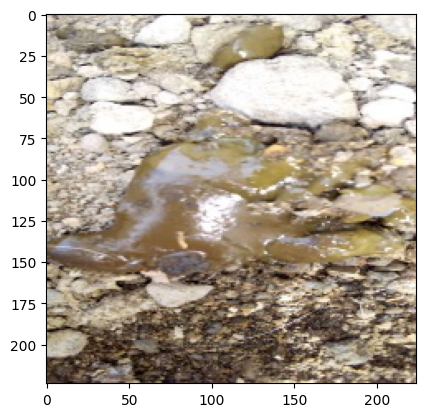


Sample healthy image:


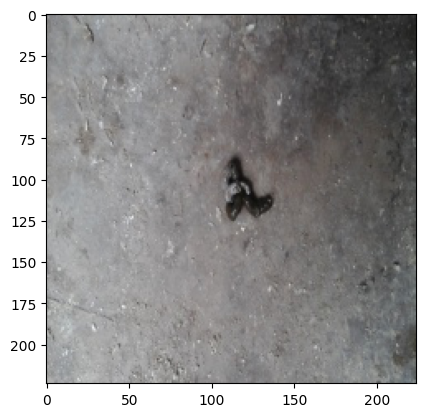


Sample salmonella image:


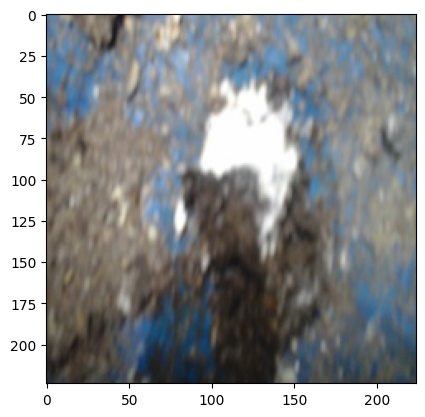

In [ ]:
# grader-required-cell

from tensorflow.keras.preprocessing.image import load_img

print("Sample coccidiosis image:")
plt.imshow(load_img(f"{os.path.join(train_coccidiosis_path, os.listdir(train_coccidiosis_path)[0])}"))
plt.show()

print("\nSample healthy image:")
plt.imshow(load_img(f"{os.path.join(train_healthy_path, os.listdir(train_healthy_path)[0])}"))
plt.show()

# print("\nSample ncd image:")
# plt.imshow(load_img(f"{os.path.join(train_ncd_path, os.listdir(train_ncd_path)[0])}"))
# plt.show()

print("\nSample salmonella image:")
plt.imshow(load_img(f"{os.path.join(train_salmonella_path, os.listdir(train_salmonella_path)[0])}"))
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(train_coccidiosis_path, os.listdir(train_coccidiosis_path)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (224, 224, 3)
The maximum pixel value used is: 255.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator instance
image_datagen = ImageDataGenerator(rescale=1./255)

# Create a train generator
train_generator = image_datagen.flow_from_directory(
        f'{cwd}/datasets/train/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        class_mode='categorical')

# Create a validation generator
val_generator = image_datagen.flow_from_directory(
        f'{cwd}/datasets/val/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        class_mode='categorical')


Found 5252 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
import tensorflow_hub as hub

mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))
mobile_net_layers.trainable = False

In [ ]:
#create tensorflow model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # mobile_net_layers,
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 64)      

In [ ]:
#compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#constant for number of epochs
NUM_EPOCHS = 50

#fit model
history = model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/50
165/165 [==============================] - 21s 113ms/step - loss: 0.7875 - accuracy: 0.6302 - val_loss: 0.4443 - val_accuracy: 0.8100
Epoch 2/50
165/165 [==============================] - 20s 119ms/step - loss: 0.5059 - accuracy: 0.8016 - val_loss: 0.3961 - val_accuracy: 0.8500
Epoch 3/50
165/165 [==============================] - 18s 110ms/step - loss: 0.4371 - accuracy: 0.8342 - val_loss: 0.2917 - val_accuracy: 0.8893
Epoch 4/50
165/165 [==============================] - 18s 111ms/step - loss: 0.3743 - accuracy: 0.8629 - val_loss: 0.4709 - val_accuracy: 0.8320
Epoch 5/50
165/165 [==============================] - 19s 117ms/step - loss: 0.3203 - accuracy: 0.8783 - val_loss: 0.2324 - val_accuracy: 0.9200
Epoch 6/50
165/165 [==============================] - 18s 111ms/step - loss: 0.2872 - accuracy: 0.8896 - val_loss: 0.2563 - val_accuracy: 0.8993
Epoch 7/50
165/165 [==============================] - 19s 116ms/step - loss: 0.2461 - accuracy: 0.9023 - val_loss: 0.3488 - val_ac

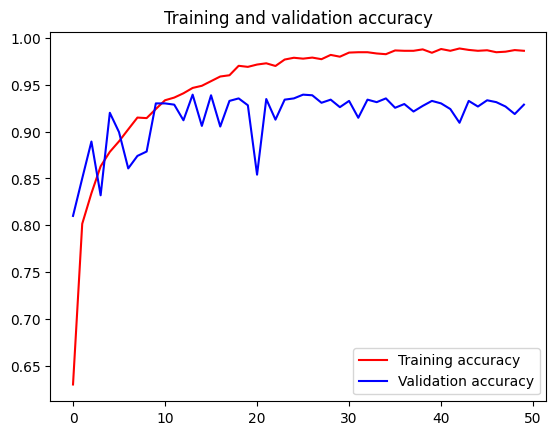

<Figure size 640x480 with 0 Axes>

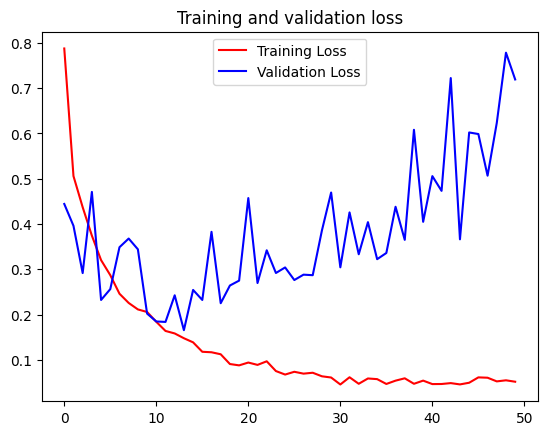

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# calculating the recall, precision and f1-score
from sklearn.metrics import classification_report, confusion_matrix

test_generator = image_datagen.flow_from_directory(
        f'{cwd}/datasets/test/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=16,
        class_mode='categorical')

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['coccidiosis', 'healthy',  'salmonella']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 753 images belonging to 3 classes.
48/48 [==============================] - 2s 36ms/step
Confusion Matrix
[[ 70  80  98]
 [ 77  80  85]
 [100  76  87]]
Classification Report
              precision    recall  f1-score   support

 coccidiosis       0.28      0.28      0.28       248
     healthy       0.34      0.33      0.33       242
  salmonella       0.32      0.33      0.33       263

    accuracy                           0.31       753
   macro avg       0.31      0.31      0.31       753
weighted avg       0.31      0.31      0.31       753



Saving healthy.1814.jpg to healthy.1814.jpg


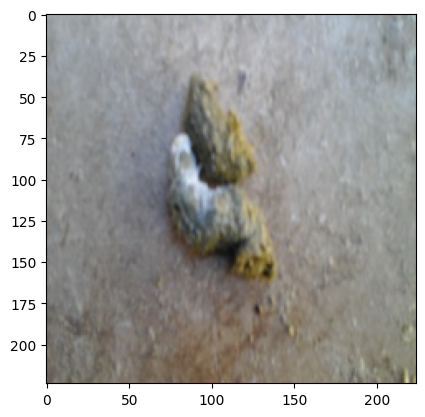

1/1 [==============================] - 0s 20ms/step
[5.959385e-19 1.000000e+00 9.097609e-15]
healthy


In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  plt.imshow(img)
  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  index = np.argmax(classes[0])
  
  if index == 0:
    print('coccidiosis')

  elif index == 1:  
    print('healthy')
    
  elif index == 2:
    print('salmo')
 

In [ ]:
#label map
label_map = {0: 'coccidiosis', 1: 'healthy', 2: 'salmonella'}

def confidence_test(path, label):
    correct_predictions = 0
    total_predictions = 0

    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image = load_img(image_path, target_size=(224, 224))
        image_array = img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)
        predictions = model.predict(image_array)
        predicted_index = np.argmax(predictions)
        predicted_label = label_map[predicted_index]
        predicted_probability = predictions[0][predicted_index]

        print(f"The predicted label for the image {image_name} is: {predicted_label}")
        print(f"The confidence for this prediction is: {predicted_probability}")

        if predicted_label == label:
            correct_predictions += 1

        total_predictions += 1

    return correct_predictions / total_predictions

test_path = os.path.join(cwd, 'datasets', 'test')

class_labels = ['coccidiosis', 'healthy',  'salmonella']
class_confidences = {}

for class_label in class_labels:
    class_path = os.path.join(test_path, class_label)
    class_confidence = confidence_test(class_path, class_label)
    class_confidences[class_label] = class_confidence


1/1 [==============================] - 0s 18ms/step
The predicted label for the image cocci.747.jpg is: coccidiosis
The confidence for this prediction is: 1.0
1/1 [==============================] - 0s 23ms/step
The predicted label for the image cocci.1401.jpg is: coccidiosis
The confidence for this prediction is: 1.0
1/1 [==============================] - 0s 24ms/step
The predicted label for the image cocci.187.jpg is: coccidiosis
The confidence for this prediction is: 1.0
1/1 [==============================] - 0s 19ms/step
The predicted label for the image cocci.252.jpg is: coccidiosis
The confidence for this prediction is: 1.0
1/1 [==============================] - 0s 22ms/step
The predicted label for the image cocci.106.jpg is: coccidiosis
The confidence for this prediction is: 1.0
1/1 [==============================] - 0s 18ms/step
The predicted label for the image cocci.932.jpg is: coccidiosis
The confidence for this prediction is: 1.0
1/1 [==============================] - 0s 19m

In [ ]:
accuracy = 0
for class_label, confidence in class_confidences.items():
    print(f"The model correctly predicted {confidence * 100}% of the {class_label} images")
    accuracy += confidence * 100

accuracy /= 3

print(f'\nOverall accuracy is {accuracy}%')


The model correctly predicted 94.75806451612904% of the coccidiosis images
The model correctly predicted 89.25619834710744% of the healthy images
The model correctly predicted 81.36882129277566% of the salmonella images

Overall accuracy is 88.46102805200405%


## Generate a model

In [ ]:
export_path = "saved_model/1"
tf.saved_model.save(model, export_path)

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
tflite_model_file = 'model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)


In [ ]:
import pathlib

tflite_model_file = 'model.tflite'
tflite_model_file = pathlib.Path(tflite_model_file)

# Get the file size of the model in MegaBytes
print(f"The size of the tflite model is: {round(tflite_model_file.stat().st_size / (1024 * 1024), 2)} MB")

The size of the tflite model is: 0.18 MB
